In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sinc
from scipy.signal.windows import hamming
from scipy.signal import lfilter

In [7]:
# ex01 Parameters
f1 = 0.5e3
f2 = 0.6e3
fs = 10e3
Ts = 1 / fs
tlen = 0.5
t = np.arange(0, tlen, Ts)
N = len(t)

# ex02 Parameters
f1 = 0.5e3
fs = 10e3
fcf = f1 * 1.1
Omegacf = 2 * np.pi * fcf / fs
M = 101
n = np.arange(0, M) - np.floor(M / 2)
h = Omegacf / np.pi * np.sinc(n * Omegacf / np.pi)
w = hamming(M)
# w = np.ones(M)  # Uncomment this line if you want to use a rectangular window
A = 1
B = h * w

In [8]:
# Signals from ex01
x = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)
standev = 1
n = np.random.randn(N) * standev
xn = x + n

In [10]:
# Filter the signal from ex02
y = lfilter(B, A, xn)

In [11]:
# Compute the FFT of the signals
X = np.abs(np.fft.fft(x))
Xn = np.abs(np.fft.fft(xn))
Y = np.abs(np.fft.fft(y))

In [12]:
# Frequency bin
fbin = fs / N
f = np.arange(0, fs, fbin)

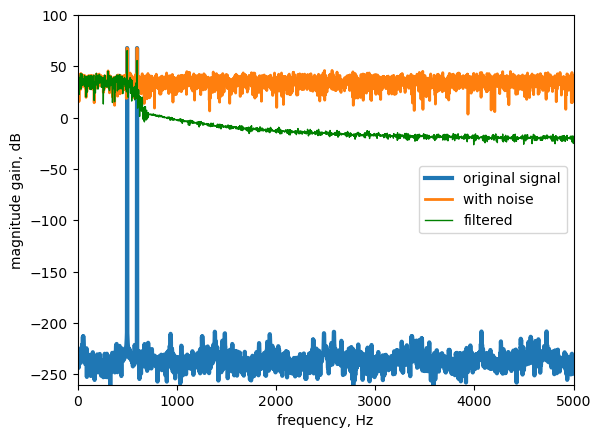

In [13]:
# Plotting
plt.plot(f, 20 * np.log10(X), linewidth=3, label='original signal')
plt.plot(f, 20 * np.log10(Xn), linewidth=2, label='with noise')
plt.plot(f, 20 * np.log10(Y), 'g', linewidth=1, label='filtered')

plt.axis([0, fs/2, -260, 100])
plt.xlabel('frequency, Hz')
plt.ylabel('magnitude gain, dB')
plt.legend()
plt.show()